In [1]:
import os
import pandas as pd
import numpy  as np

In [2]:
os.getcwd()
os.chdir('/Users/zhangjinwei/Desktop/')

In [3]:
data = pd.read_csv("wanweishuju02.csv")
data = data.set_index("ID")
data.head()

,生产批次,相变温度,升温最高温度,投醛时间（min）,丁醛加入量,速率kg/min,产品水分
ID,,,,,,,
1,2022092102a,NaN,66.4,52,393.8,7.57,0.9
2,22091701b,11.36,55.1,50,406.6,8.13,1.0
3,2022091702d,10.68,59.8,55,407.1,7.40,1.2
4,2022091703d,10.77,59.7,54,408.2,7.56,0.9
5,2022091702b,11.30,55.9,53,410.9,7.75,0.8


In [4]:
data = data.fillna(method="bfill")
# data = data.fillna(method="ffill")
data = data.rename(columns=({"投醛时间（min）":"投醛时间(min)"}))
data["id"] = data.index
data.tail(20)

,生产批次,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
ID,,,,,,,,
231,2022062102D,9.56,62.60,40,400.4,10.01,NaN,231
232,2022062104D,9.78,63.90,42,401.4,9.56,NaN,232
233,2022062101B,11.50,59.00,60,402.4,6.71,NaN,233
234,2022062103D,9.72,63.00,42,401.5,9.56,NaN,234
235,2022062004B,10.90,58.20,46,406.3,8.83,NaN,235
236,2022061803AX3T,13.70,69.70,87,399.3,4.59,NaN,236
237,2022062004C,10.64,57.50,43,400.7,9.32,NaN,237
238,2022062003D,10.01,63.80,42,401.0,9.55,NaN,238
239,2022062101D,10.33,62.90,41,402.3,9.81,NaN,239


In [5]:
data.isnull().sum()

生产批次           0
相变温度           0
升温最高温度         0
投醛时间(min)      0
丁醛加入量          0
速率kg/min       0
产品水分         143
id             0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

In [12]:
import plotly.express as px

In [15]:
px.box(data, y = ["丁醛加入量"]           )

{'whiskers': [<matplotlib.lines.Line2D at 0x169d5b490>,
 'caps': [<matplotlib.lines.Line2D at 0x169d5ba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x169d5b1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x169d5bfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x169d672e0>],
 'means': []}

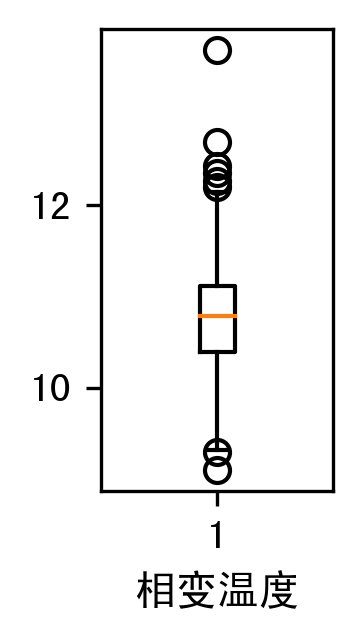

In [16]:
# 用来正常显示中文标签 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号 
plt.rcParams['axes.unicode_minus']=False

a_array = data["相变温度"]
plt.figure(figsize=(1, 2), dpi =300 )
plt.xlabel("相变温度")
plt.boxplot(a_array)

绘制时序图

In [101]:
df

,生产批次,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
ID,,,,,,,,
1,2022092102a,11.36,66.40,52,393.8,7.57,0.9,1
2,22091701b,11.36,55.10,50,406.6,8.13,1.0,2
3,2022091702d,10.68,59.80,55,407.1,7.40,1.2,3
4,2022091703d,10.77,59.70,54,408.2,7.56,0.9,4
5,2022091702b,11.30,55.90,53,410.9,7.75,0.8,5
...,...,...,...,...,...,...,...,...
246,2022061401C,11.00,62.00,56,402.1,7.18,NaN,246
247,2022061402C,10.81,61.50,52,402.3,7.74,NaN,247
248,2022061403C,10.61,58.90,56,401.8,7.18,NaN,248


In [102]:
import pandas as pd
import os 
import pyecharts
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType 

In [103]:
# 绘制单组折线图
from pyecharts.charts import Line
# 很奇怪，每次运行次，第二次调用Line就会失败
df = data.loc[data["投醛时间(min)"] > 0,:]
x = list(df["id"])
y1 = list(df["投醛时间(min)"])

Line = (
    Line(init_opts=opts.InitOpts (theme= ThemeType.WHITE,           
                                 bg_color="white",                 
                                 width="1000px", height="400px"    
                                 ) ) 
    # 可通过 theme= ThemeType.WHITE 更换主题
    # 修改背景颜色，若删除则变为黑色，不便于观看。
    # 可通过此处调整图片大小，也可以删除此处。
    .add_xaxis(x) 
    .add_yaxis("y标签", y1, 
               markpoint_opts=opts.MarkPointOpts(data = [opts.MarkPointItem(type_ = "max")]),
               markline_opts=opts.MarkLineOpts(data =[opts.MarkLineItem( y = 12 ) ] ))  
     # "2011"在图例中显示，不可删除。 通过 gap="2%" 设置不同柱之间的间距，不需要可以删除。
     # markpoint_opts, markline_opts, 可以添加标记点和标记线。 
     # .add_yaxis() 可以继续添加多类柱状图，展示为分组柱状图。
     
    ## 添加全局设置
    .set_global_opts( xaxis_opts = opts.AxisOpts(name = "序列", axislabel_opts=opts.LabelOpts(rotate=25)),
                      yaxis_opts = opts.AxisOpts(name = "数值"),
                      title_opts = opts.TitleOpts( title ="投醛时间(min)的时序图" ),          
                      legend_opts  = opts.LegendOpts(is_show=False),   
                      #toolbox_opts = opts.ToolboxOpts(),  
                      #datazoom_opts= opts.DataZoomOpts(is_show=True, type_="slider"), 
                      #tooltip_opts = opts.TooltipOpts(trigger="axis", axis_pointer_type="cross") 
                      )  
      # axislabel_opts 调整X轴标签的角度，可表示为-35
      # legend_opts   显示图例
      # toolbox_opts  展示工具箱
      # datazoom_opts 显示缩放条,type_="inside"会隐藏缩放条，但是可以缩放。需要显示缩放条，删除type_="inside"即可。
      # tooltip_opts  添加坐标线，选中某个点时，会出现坐标虚线，不需要可以删除。
      # .reversal_axis()  # 翻转柱状图
      
    ## 对所有序列设置-标记点，标记线。优先级大于在 .add_yaxis()中的设置。若已经在.add_yaxis()中设置，此处可以删除。
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                ]
            ) ,
        markline_opts=opts.MarkLineOpts(data = [opts.MarkLineItem(type_="average",name = "平均值")] )
    )
)
Line.render_notebook()
# 在notebook中显示
# 输出为一个html的文件
# Line.render()

In [104]:
# 绘制单组折线图
from pyecharts.charts import Line
# 很奇怪，每次运行次，第二次调用Line就会失败
df = data
x = list(df["id"])
y1 = list(df["丁醛加入量"])

Line = (
    Line(init_opts=opts.InitOpts (theme= ThemeType.WHITE,           
                                 bg_color="white",                 
                                 width="1000px", height="400px"    
                                 ) ) 
    # 可通过 theme= ThemeType.WHITE 更换主题
    # 修改背景颜色，若删除则变为黑色，不便于观看。
    # 可通过此处调整图片大小，也可以删除此处。
    .add_xaxis(x) 
    .add_yaxis("y标签", y1, 
               markpoint_opts=opts.MarkPointOpts(data = [opts.MarkPointItem(type_ = "max")]),
               markline_opts=opts.MarkLineOpts(data =[opts.MarkLineItem( y = 12 ) ] ))  
     # "2011"在图例中显示，不可删除。 通过 gap="2%" 设置不同柱之间的间距，不需要可以删除。
     # markpoint_opts, markline_opts, 可以添加标记点和标记线。 
     # .add_yaxis() 可以继续添加多类柱状图，展示为分组柱状图。
     
    ## 添加全局设置
    .set_global_opts( xaxis_opts = opts.AxisOpts(name = "序列", axislabel_opts=opts.LabelOpts(rotate=25)),
                      yaxis_opts = opts.AxisOpts(name = "数值"),
                      title_opts = opts.TitleOpts( title ="丁醛加入量的时序图" ),          
                      legend_opts  = opts.LegendOpts(is_show=False),   
                      #toolbox_opts = opts.ToolboxOpts(),  
                      #datazoom_opts= opts.DataZoomOpts(is_show=True, type_="slider"), 
                      #tooltip_opts = opts.TooltipOpts(trigger="axis", axis_pointer_type="cross") 
                      )  
      # axislabel_opts 调整X轴标签的角度，可表示为-35
      # legend_opts   显示图例
      # toolbox_opts  展示工具箱
      # datazoom_opts 显示缩放条,type_="inside"会隐藏缩放条，但是可以缩放。需要显示缩放条，删除type_="inside"即可。
      # tooltip_opts  添加坐标线，选中某个点时，会出现坐标虚线，不需要可以删除。
      # .reversal_axis()  # 翻转柱状图
      
    ## 对所有序列设置-标记点，标记线。优先级大于在 .add_yaxis()中的设置。若已经在.add_yaxis()中设置，此处可以删除。
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                ]
            ) ,
        markline_opts=opts.MarkLineOpts(data = [opts.MarkLineItem(type_="average",name = "平均值")] )
    )
)
Line.render_notebook()
# 在notebook中显示
# 输出为一个html的文件
# Line.render()

In [105]:
# 绘制单组折线图
from pyecharts.charts import Line
# 很奇怪，每次运行次，第二次调用Line就会失败
df = data
x = list(df["id"])
y1 = list(df["丁醛加入量"])

Line = (
    Line(init_opts=opts.InitOpts (theme= ThemeType.WHITE,           
                                 bg_color="white",                 
                                 width="1000px", height="400px"    
                                 ) ) 
    # 可通过 theme= ThemeType.WHITE 更换主题
    # 修改背景颜色，若删除则变为黑色，不便于观看。
    # 可通过此处调整图片大小，也可以删除此处。
    .add_xaxis(x) 
    .add_yaxis("y标签", y1, 
               markpoint_opts=opts.MarkPointOpts(data = [opts.MarkPointItem(type_ = "max")]),
               markline_opts=opts.MarkLineOpts(data =[opts.MarkLineItem( y = 12 ) ] ))  
     # "2011"在图例中显示，不可删除。 通过 gap="2%" 设置不同柱之间的间距，不需要可以删除。
     # markpoint_opts, markline_opts, 可以添加标记点和标记线。 
     # .add_yaxis() 可以继续添加多类柱状图，展示为分组柱状图。
     
    ## 添加全局设置
    .set_global_opts( xaxis_opts = opts.AxisOpts(name = "序列", axislabel_opts=opts.LabelOpts(rotate=25)),
                      yaxis_opts = opts.AxisOpts(name = "数值"),
                      title_opts = opts.TitleOpts( title ="丁醛加入量的时序图" ),          
                      legend_opts  = opts.LegendOpts(is_show=False),   
                      #toolbox_opts = opts.ToolboxOpts(),  
                      #datazoom_opts= opts.DataZoomOpts(is_show=True, type_="slider"), 
                      #tooltip_opts = opts.TooltipOpts(trigger="axis", axis_pointer_type="cross") 
                      )  
      # axislabel_opts 调整X轴标签的角度，可表示为-35
      # legend_opts   显示图例
      # toolbox_opts  展示工具箱
      # datazoom_opts 显示缩放条,type_="inside"会隐藏缩放条，但是可以缩放。需要显示缩放条，删除type_="inside"即可。
      # tooltip_opts  添加坐标线，选中某个点时，会出现坐标虚线，不需要可以删除。
      # .reversal_axis()  # 翻转柱状图
      
    ## 对所有序列设置-标记点，标记线。优先级大于在 .add_yaxis()中的设置。若已经在.add_yaxis()中设置，此处可以删除。
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                ]
            ) ,
        markline_opts=opts.MarkLineOpts(data = [opts.MarkLineItem(type_="average",name = "平均值")] )
    )
)
Line.render_notebook()
# 在notebook中显示
# 输出为一个html的文件
# Line.render()

In [106]:
# 绘制单组折线图
from pyecharts.charts import Line
# 很奇怪，每次运行次，第二次调用Line就会失败
df = data
x = list(df["id"])
y1 = list(df["产品水分"])

Line = (
    Line(init_opts=opts.InitOpts (theme= ThemeType.WHITE,           
                                 bg_color="white",                 
                                 width="1000px", height="400px"    
                                 ) ) 
    # 可通过 theme= ThemeType.WHITE 更换主题
    # 修改背景颜色，若删除则变为黑色，不便于观看。
    # 可通过此处调整图片大小，也可以删除此处。
    .add_xaxis(x) 
    .add_yaxis("y标签", y1, 
               markpoint_opts=opts.MarkPointOpts(data = [opts.MarkPointItem(type_ = "max")]),
               markline_opts=opts.MarkLineOpts(data =[opts.MarkLineItem( y = 12 ) ] ))  
     # "2011"在图例中显示，不可删除。 通过 gap="2%" 设置不同柱之间的间距，不需要可以删除。
     # markpoint_opts, markline_opts, 可以添加标记点和标记线。 
     # .add_yaxis() 可以继续添加多类柱状图，展示为分组柱状图。
     
    ## 添加全局设置
    .set_global_opts( xaxis_opts = opts.AxisOpts(name = "序列", axislabel_opts=opts.LabelOpts(rotate=25)),
                      yaxis_opts = opts.AxisOpts(name = "数值"),
                      title_opts = opts.TitleOpts( title ="产品水分的时序图" ),          
                      legend_opts  = opts.LegendOpts(is_show=False),   
                      #toolbox_opts = opts.ToolboxOpts(),  
                      #datazoom_opts= opts.DataZoomOpts(is_show=True, type_="slider"), 
                      #tooltip_opts = opts.TooltipOpts(trigger="axis", axis_pointer_type="cross") 
                      )  
      # axislabel_opts 调整X轴标签的角度，可表示为-35
      # legend_opts   显示图例
      # toolbox_opts  展示工具箱
      # datazoom_opts 显示缩放条,type_="inside"会隐藏缩放条，但是可以缩放。需要显示缩放条，删除type_="inside"即可。
      # tooltip_opts  添加坐标线，选中某个点时，会出现坐标虚线，不需要可以删除。
      # .reversal_axis()  # 翻转柱状图
      
    ## 对所有序列设置-标记点，标记线。优先级大于在 .add_yaxis()中的设置。若已经在.add_yaxis()中设置，此处可以删除。
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                ]
            ) ,
        markline_opts=opts.MarkLineOpts(data = [opts.MarkLineItem(type_="average",name = "平均值")] )
    )
)
Line.render_notebook()
# 在notebook中显示
# 输出为一个html的文件
# Line.render()

In [107]:
data

,生产批次,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
ID,,,,,,,,
1,2022092102a,11.36,66.40,52,393.8,7.57,0.9,1
2,22091701b,11.36,55.10,50,406.6,8.13,1.0,2
3,2022091702d,10.68,59.80,55,407.1,7.40,1.2,3
4,2022091703d,10.77,59.70,54,408.2,7.56,0.9,4
5,2022091702b,11.30,55.90,53,410.9,7.75,0.8,5
...,...,...,...,...,...,...,...,...
246,2022061401C,11.00,62.00,56,402.1,7.18,NaN,246
247,2022061402C,10.81,61.50,52,402.3,7.74,NaN,247
248,2022061403C,10.61,58.90,56,401.8,7.18,NaN,248


In [111]:
# 箱形图
import plotly.express as px

df = data12
fig = px.box(df, x="指标", y="数值",title="所有指标的箱线图", notched=True)
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x17b0f2550>,
 'caps': [<matplotlib.lines.Line2D at 0x17b0f2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b0f22e0>],
 'medians': [<matplotlib.lines.Line2D at 0x17b0c6070>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b0c6340>],
 'means': []}

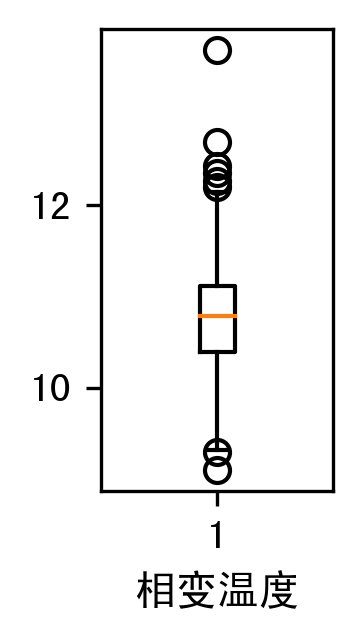

In [112]:
import matplotlib.pyplot as plt
# 用来正常显示中文标签 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号 
plt.rcParams['axes.unicode_minus']=False

a_array = data["相变温度"]
plt.figure(figsize=(1, 2), dpi =300 )
plt.xlabel("相变温度")
plt.boxplot(a_array)

In [113]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
adf_result1 = adfuller(data["相变温度"])
print(adf_result1)


(-6.731148449429899, 3.2935629924869543e-09, 2, 245, {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}, 447.98061431337453)


In [114]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
adf_result1 = adfuller(data["升温最高温度"])
print(adf_result1)

(-9.864311165788052, 4.153048360055525e-17, 1, 246, {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}, 1389.204620948994)


In [115]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
adf_result1 = adfuller(data["丁醛加入量"])
print(adf_result1)

(-3.3172643971994744, 0.014124173665364677, 6, 241, {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}, 1642.2116274436553)


In [119]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
adf_result1 = adfuller(data["投醛时间(min)"])
print(adf_result1)

(-14.10441835375107, 2.5846041453758216e-26, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 1899.392025336786)


In [120]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
adf_result1 = adfuller(data.loc[0:92,"产品水分"])
print(adf_result1)

(-6.097987737082778, 9.992891321769048e-08, 1, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -17.621310359316965)


In [121]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 1 to 250
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   生产批次       248 non-null    object 
 1   相变温度       248 non-null    float64
 2   升温最高温度     248 non-null    float64
 3   投醛时间(min)  248 non-null    int64  
 4   丁醛加入量      248 non-null    float64
 5   速率kg/min   248 non-null    float64
 6   产品水分       105 non-null    float64
 7   id         248 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 25.5+ KB
None


In [122]:
data.describe()

,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
count,248.000000,248.000000,248.000000,248.000000,248.000000,105.000000,248.000000
mean,10.768839,59.936210,52.370968,404.021573,8.165403,0.999048,125.471774
std,0.640142,4.746491,14.268375,8.885306,3.437869,0.214160,72.441678
min,9.090000,11.500000,0.000000,362.100000,2.210000,0.600000,1.000000
25%,10.387500,58.575000,45.000000,401.400000,7.160000,0.800000,62.750000
50%,10.790000,59.900000,51.000000,402.400000,7.875000,1.000000,125.500000
75%,11.110000,62.100000,56.000000,406.125000,9.002500,1.100000,188.250000
max,13.700000,69.700000,182.000000,499.000000,57.330000,2.300000,250.000000


In [125]:
 data.loc[data["投醛时间(min)"] == 0 ,:] 

,生产批次,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
ID,,,,,,,,
176,2022062202C,11.3,57.7,0,402.1,6.49,NaN,176


In [124]:
 data.loc[data["丁醛加入量"] == 499 ,:] 

,生产批次,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
ID,,,,,,,,
33,2022092003b,11.42,59.2,47,499.0,10.62,1.2,33


In [46]:
data

,生产批次,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
ID,,,,,,,,
1,2022092102a,11.36,66.40,52,393.8,7.57,0.9,1
2,22091701b,11.36,55.10,50,406.6,8.13,1.0,2
3,2022091702d,10.68,59.80,55,407.1,7.40,1.2,3
4,2022091703d,10.77,59.70,54,408.2,7.56,0.9,4
5,2022091702b,11.30,55.90,53,410.9,7.75,0.8,5
...,...,...,...,...,...,...,...,...
246,2022061401C,11.00,62.00,56,402.1,7.18,NaN,246
247,2022061402C,10.81,61.50,52,402.3,7.74,NaN,247
248,2022061403C,10.61,58.90,56,401.8,7.18,NaN,248


In [ ]:
def abnormalvalue(df):
     print( "-------------------异常值的检测与处理部分-------------------\n")
     print( "--------------数据大小为 " + str(df.shape)+ " ---------------")
     nrow1 = list( df.shape)[0]
     print("{:<30s} {:<50s}".format( "列标签",  "异常值个数 \n" ) )
     neq_sum = 0
     neq_sum2 = 0
     
     for item in df.columns:
         neg_item = ( abs((df[item] - df[item].mean())/df[item].std())>3 )
         print("{:<30s} {:<50s}".format( item,  str( neg_item.sum() ) ) )
         neq_sum = neq_sum + neg_item.sum()
         
       
         
     if (neq_sum == 0)&( neq_sum2 == 0):   
        print( '\n--------------在所有列中共有0条异常值-------------')
        print( "----------恭喜你，已经得到了没有异常值的数据-----------")  
     else:      
         print( '\n--------------3西格玛准则下, 在所有列中共有 ' + str( neq_sum )  + ' 个异常值-------------')
         print( "-----------下面将先删除数据中存在异常的行数据----------")
         for item in df.columns: 
             df = df[abs((df[item] - df[item].mean())/df[item].std())<=3]
         nrow2 = list( df.shape)[0]
         print( "------------------3西格玛, 我们删除了"+ str(nrow1 - nrow2) + "条异常数据--------------------")
         
         print("{:<30s} {:<50s}".format( "\n 列标签",  "异常值个数 \n" ) ) 
         
         for item2 in df.columns:
            iqr = df[item2].quantile(0.75) - df[item2].quantile(0.25)
            q_abnormal_L = (df[item2] - (df[item2].quantile(0.25) - 1.5 * iqr) < 0)
            q_abnormal_U = (df[item2] - (df[item2].quantile(0.75) + 1.5 * iqr) > 0)
            neg_item2 =  q_abnormal_L.sum() + q_abnormal_U.sum()
            print("{:<30s} {:<50s}".format( item2,  str( neg_item2.sum() ) ) )
            neq_sum2 = neq_sum2 + neg_item2.sum()
         print( '\n--------------此时在箱线图准则下, 在所有列中共有 ' + str( neq_sum2 )  + ' 个异常值-------------')
         for item2 in df.columns: 
             iqr = df[item2].quantile(0.75) - df[item2].quantile(0.25)
             df = df[(df[item2] - (df[item2].quantile(0.25) - 1.5 * iqr))>=0]
         for item2 in df.columns: 
             iqr = df[item2].quantile(0.75) - df[item2].quantile(0.25)
             df = df[(df[item2] - (df[item2].quantile(0.75) + 1.5 * iqr))<=0]      
         nrow3 = list( df.shape)[0]
         print( "------------------在箱线图准则下， 我们删除"+ str(nrow2 - nrow3) + "条异常数据--------------------")
         print( "\n------------------最后经过处理后数据大小为 " + str(df.shape)+ " --------------------")
     return df  

In [129]:
df =data
df

,生产批次,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分,id
ID,,,,,,,,
1,2022092102a,11.36,66.40,52,393.8,7.57,0.9,1
2,22091701b,11.36,55.10,50,406.6,8.13,1.0,2
3,2022091702d,10.68,59.80,55,407.1,7.40,1.2,3
4,2022091703d,10.77,59.70,54,408.2,7.56,0.9,4
5,2022091702b,11.30,55.90,53,410.9,7.75,0.8,5
...,...,...,...,...,...,...,...,...
246,2022061401C,11.00,62.00,56,402.1,7.18,NaN,246
247,2022061402C,10.81,61.50,52,402.3,7.74,NaN,247
248,2022061403C,10.61,58.90,56,401.8,7.18,NaN,248


In [144]:
# 箱线图法则查找异常值
list1 = df["相变温度"]
iqr = list1.quantile(0.75) - list1.quantile(0.25)

da1 = (list1 - (list1.quantile(0.25) - 1.5 * iqr) < 0) 
da2 =  (list1 - (list1.quantile(0.75) + 1.5 * iqr) > 0)
name = ( df.loc[ (da1 | da2 ) , : ]) 
print(name)   
     

               生产批次   相变温度  升温最高温度  投醛时间(min)  丁醛加入量  速率kg/min  产品水分   id
ID                                                                       
60      2022091503c   9.29    58.2         56  408.1      7.29   0.9   60
90   2022082201amg5  12.43    61.5         42  421.8     10.04   2.3   90
94   2022082003amg4  12.20    62.4         43  414.1      9.63   1.2   94
178  2022062302AX3T  12.27    68.5         86  400.6      4.66   NaN  178
189     2022062305D   9.09    63.7         40  401.9     10.05   NaN  189
222     2022062002B  12.36    59.7         80  397.7      4.97   NaN  222
228  2022061901AX3T  12.70    68.3        111  399.6      3.60   NaN  228
236  2022061803AX3T  13.70    69.7         87  399.3      4.59   NaN  236


In [152]:
# 箱线图法则查找异常值
def boxjianyan(data):
    for item in data.columns:
         list1 = df[item]
         iqr = list1.quantile(0.75) - list1.quantile(0.25)
         da1 = (list1 - (list1.quantile(0.25) - 1.5 * iqr) < 0) 
         da2 =  (list1 - (list1.quantile(0.75) + 1.5 * iqr) > 0)
         name = ( df.loc[ (da1 | da2 ) , : ]) 
         print(str(item)+ "异常数据为：")
         print(name)   

In [150]:
df1 = df.iloc[:,1:7]
df1 

,相变温度,升温最高温度,投醛时间(min),丁醛加入量,速率kg/min,产品水分
ID,,,,,,
1,11.36,66.40,52,393.8,7.57,0.9
2,11.36,55.10,50,406.6,8.13,1.0
3,10.68,59.80,55,407.1,7.40,1.2
4,10.77,59.70,54,408.2,7.56,0.9
5,11.30,55.90,53,410.9,7.75,0.8
...,...,...,...,...,...,...
246,11.00,62.00,56,402.1,7.18,NaN
247,10.81,61.50,52,402.3,7.74,NaN
248,10.61,58.90,56,401.8,7.18,NaN


In [153]:
boxjianyan(df1)

相变温度异常数据为：
               生产批次   相变温度  升温最高温度  投醛时间(min)  丁醛加入量  速率kg/min  产品水分   id
ID                                                                       
60      2022091503c   9.29    58.2         56  408.1      7.29   0.9   60
90   2022082201amg5  12.43    61.5         42  421.8     10.04   2.3   90
94   2022082003amg4  12.20    62.4         43  414.1      9.63   1.2   94
178  2022062302AX3T  12.27    68.5         86  400.6      4.66   NaN  178
189     2022062305D   9.09    63.7         40  401.9     10.05   NaN  189
222     2022062002B  12.36    59.7         80  397.7      4.97   NaN  222
228  2022061901AX3T  12.70    68.3        111  399.6      3.60   NaN  228
236  2022061803AX3T  13.70    69.7         87  399.3      4.59   NaN  236
升温最高温度异常数据为：
               生产批次   相变温度  升温最高温度  投醛时间(min)   丁醛加入量  速率kg/min  产品水分   id
ID                                                                        
55      2022091602b  11.11    53.0         62  407.80      6.58   0.8   55
65      202

In [76]:
data.columns

Index(['生产批次', '相变温度', '升温最高温度', '投醛时间(min)', '丁醛加入量', '速率kg/min', '产品水分',
       'id'],
      dtype='object')

In [78]:
iqr = df["升温最高温度"].quantile(0.75) - df["升温最高温度"].quantile(0.25)
name = df.loc[(df["升温最高温度"] - (df["升温最高温度"].quantile(0.25) - 1.5 * iqr) < 0),"生产批次" ]
name2 = df.loc[(df["升温最高温度"] - (df["升温最高温度"].quantile(0.75) + 1.5 * iqr) > 0), "生产批次" ]
print(name)   
print(name2)   

ID
55     2022091602b
65     2022091502d
83     2022082803a
119    2022063003C
140    2022062802D
Name: 生产批次, dtype: object
ID
178    2022062302AX3T
180    2022062301AX3T
228    2022061901AX3T
236    2022061803AX3T
Name: 生产批次, dtype: object


In [79]:
iqr = df["投醛时间(min)"].quantile(0.75) - df["投醛时间(min)"].quantile(0.25)
name = df.loc[(df["投醛时间(min)"] - (df["投醛时间(min)"].quantile(0.25) - 1.5 * iqr) < 0),"生产批次" ]
name2 = df.loc[(df["投醛时间(min)"] - (df["投醛时间(min)"].quantile(0.75) + 1.5 * iqr) > 0), "生产批次" ]
print(name)   
print(name2)   

ID
119    2022063003C
176    2022062202C
Name: 生产批次, dtype: object
ID
101       2022060801b
131       2022062901D
178    2022062302AX3T
196       2022062401C
211       2022061901C
213       2022061902B
222       2022062002B
228    2022061901AX3T
229       2022062003B
236    2022061803AX3T
Name: 生产批次, dtype: object


In [81]:
iqr = df["丁醛加入量"].quantile(0.75) - df["丁醛加入量"].quantile(0.25)
name = df.loc[(df["丁醛加入量"] - (df["丁醛加入量"].quantile(0.25) - 1.5 * iqr) < 0),"生产批次" ]
name2 = df.loc[(df["丁醛加入量"] - (df["丁醛加入量"].quantile(0.75) + 1.5 * iqr) > 0), "生产批次" ]
print(name)   
print(name2)   

ID
1      2022092102a
12     2022092104b
13     2022092103b
19     2022092105c
20     2022092101d
21     2022092102d
22     2022092103d
23     2022092104d
201    2022062402B
Name: 生产批次, dtype: object
ID
33        2022092003b
40        2022091903c
59        2022091502b
76        2022071103b
77        2022082501a
85        2022082601a
90     2022082201amg5
91     2022081902amg1
92     2022082001amg2
93     2022082002amg2
94     2022082003amg4
240       2022061203A
Name: 生产批次, dtype: object


In [82]:
iqr = df["速率kg/min"].quantile(0.75) - df["速率kg/min"].quantile(0.25)
name = df.loc[(df["速率kg/min"] - (df["速率kg/min"].quantile(0.25) - 1.5 * iqr) < 0),"生产批次" ]
name2 = df.loc[(df["速率kg/min"] - (df["速率kg/min"].quantile(0.75) + 1.5 * iqr) > 0), "生产批次" ]
print(name)   
print(name2)   

ID
101       2022060801b
131       2022062901D
211       2022061901C
228    2022061901AX3T
Name: 生产批次, dtype: object
ID
119       2022063003C
180    2022062301AX3T
Name: 生产批次, dtype: object


In [83]:
iqr = df["产品水分"].quantile(0.75) - df["产品水分"].quantile(0.25)
name = df.loc[(df["产品水分"] - (df["产品水分"].quantile(0.25) - 1.5 * iqr) < 0),"生产批次" ]
name2 = df.loc[(df["产品水分"] - (df["产品水分"].quantile(0.75) + 1.5 * iqr) > 0), "生产批次" ]
print(name)   
print(name2)  

Series([], Name: 生产批次, dtype: object)
ID
89       2022082401a
90    2022082201amg5
Name: 生产批次, dtype: object


In [28]:
from matplotlib.pyplot import xlabel
import plotly.express as px
df = data
fig = px.box(df, y="相变温度",
                 width=600, height=600 )

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue"
)

fig.show()

In [32]:
import plotly.express as px
df = data
fig = px.box(df, y="相变温度",
                 width=600, height=600 )

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue"
)

fig.show()

In [18]:

import plotly.express as px

df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", facet_col="sex",
                 width=800, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()